In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Acer/Desktop/ML/house.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
del(df['date'])
df.columns

Index([u'id', u'price', u'bedrooms', u'bathrooms', u'sqft_living', u'sqft_lot',
       u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [5]:
df_norm=(df-df.min())/(df.max()-df.min())
df_norm

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.00,0.50,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.00,0.50,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.00,0.50,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.00,1.00,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.00,0.50,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871
5,0.731039,0.150820,0.121212,0.56250,0.387170,0.061429,0.0,0.0,0.00,0.50,0.833333,0.394737,0.317427,0.878261,0.000000,0.262626,0.804568,0.426910,0.750473,0.116339
6,0.133387,0.023934,0.090909,0.28125,0.107547,0.003816,0.4,0.0,0.00,0.50,0.500000,0.156250,0.000000,0.826087,0.000000,0.010101,0.247386,0.159468,0.316469,0.007085
7,0.202748,0.028439,0.090909,0.18750,0.058113,0.005567,0.0,0.0,0.00,0.50,0.500000,0.084430,0.000000,0.547826,0.000000,0.994949,0.407914,0.169435,0.215281,0.010407
8,0.243823,0.020262,0.090909,0.12500,0.112453,0.004210,0.0,0.0,0.00,0.50,0.500000,0.083333,0.151452,0.521739,0.000000,0.732323,0.573267,0.151163,0.237653,0.008572
9,0.383120,0.032525,0.090909,0.31250,0.120755,0.003659,0.4,0.0,0.00,0.50,0.500000,0.175439,0.000000,0.895652,0.000000,0.186869,0.341805,0.405316,0.342626,0.007948


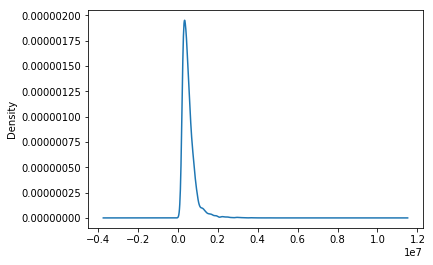

In [6]:
a = df['price']
a.plot(kind='kde')

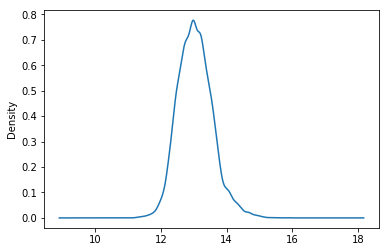

In [7]:
z = np.log(df['price'])
z.plot(kind='kde')

In [10]:
df_num = df[['price','floors']]
selector = VarianceThreshold(3)
selector.fit_transform(df_num)

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
array = df.values

In [13]:
X = array[:,0:8]

Y = array[:,8]
test = SelectKBest(score_func=chi2, k=4).fit_transform(X,Y)
X.shape,test.shape

((21613L, 8L), (21613L, 4L))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X = df_norm[['sqft_lot','floors']]
Y = df_norm['price']

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [17]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
reg.intercept_

0.048258226171250765

In [19]:
df_norm_coef = pd.DataFrame(reg.coef_,index=X.columns,columns = ['Coeff'])

In [20]:
df_norm_coef.head()

,Coeff
sqft_lot,0.183693
floors,0.055955


In [21]:
Y_pred = reg.predict(X_test)

In [22]:
df_norm = pd.DataFrame.from_dict({'Actual':Y_test,'Predicted':Y_pred})
df_norm.head()

,Actual,Predicted
6000,0.050623,0.049001
1198,0.026492,0.049107
9230,0.070164,0.049241
8675,0.021902,0.049034
12477,0.026230,0.049102


In [23]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test,Y_pred))

0.002060414286032511
